In [1]:
from basicGP import BasicGP
from blackBoxFunction import BlackBoxFunction as BBF
from plot import Plotter
from utilityFunctions import AcquisitionFunction, Optimizer

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

%matplotlib inline  
%load_ext autoreload
%autoreload 2

np.random.seed(0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Show points that are sampled

In [23]:
%autoreload 2

# Prediction data
n = 50
samples = 5
Xpred = np.linspace(-5, 5, n).reshape(-1,1)

# Training data (without noise)
Xtrain = np.random.choice(range(-5, 5), size=(samples, 1))
ytrain = BBF.eval(Xtrain)

In [24]:
%autoreload 2

GP = BasicGP(kernel_param=0.1)
GP.set_datapoints(Xtrain, ytrain)
GP.set_predictant(Xpred)

GP.calculate_kernels()

mean_vec = GP.predict_mean()
stddev_vec = GP.predict_stddev()

/Users/davidal/GoogleDrive/BachelorThesis/basicGP.py:52: RuntimeWarning: invalid value encountered in sqrt
  return np.diagonal(np.sqrt(res)).reshape((-1,))


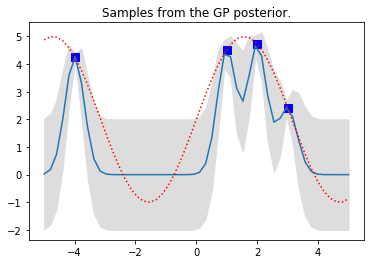

In [25]:
plotter = Plotter()
plotter.visualize_1D(Xtrain, ytrain, Xpred, BBF.eval, mean_vec, stddev_vec)

/Users/davidal/GoogleDrive/BachelorThesis/basicGP.py:52: RuntimeWarning: invalid value encountered in sqrt
  return np.diagonal(np.sqrt(res)).reshape((-1,))


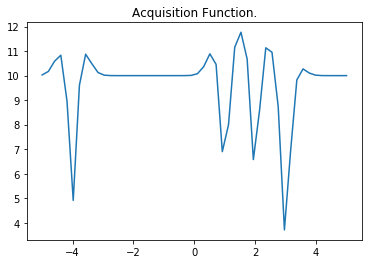

In [26]:
plotter.visualize_acq_1D(Xpred, AcquisitionFunction.ucb, GP, 10)